### 클래스란 무엇일까?

 - 세상에는 수없이 많은 나무들이 있음
 
 - 이 많은 나무들을 모두 ‘나무’라는 하나의 범주로 지칭할 수 있음
 
 - 세부적으로 나누어서보면 소나무, 은행나무, 밤나무 등등 나누어서 나무의 이름을 지칭할 수 있음
 
 - 이러한 '나무'들은 특징들을 공유하지만 세부적으로 다름
 
 > - 공유하는 특징 : 잎을 가짐 / 뿌리를 가짐 / 줄기를 가짐 / 향이 있음 / 불에 잘 탐
 >
 > - 공유하지 않는 특징 : 은행나무는 노란 잎을 가지며 열매로 인한 구리구리한 향을 가짐 / 소나무는 뾰족한 잎을 가지며 향긋한 향을 가짐
 
 - 데이터라는 것을 정리할 때 위와 같은 범주와 특징 분류를 사용할 수 있다면 좋을 것 같다?! -> class!

### 개별 데이터 정의하기

 - 컬렉션을 중첩해서 복잡한 구조의 정보를 표현할 수 있음
 
 - 아래의 그림의 도형들을 사전을 중첩하여 표현해보자

In [1]:
from IPython.display import Image

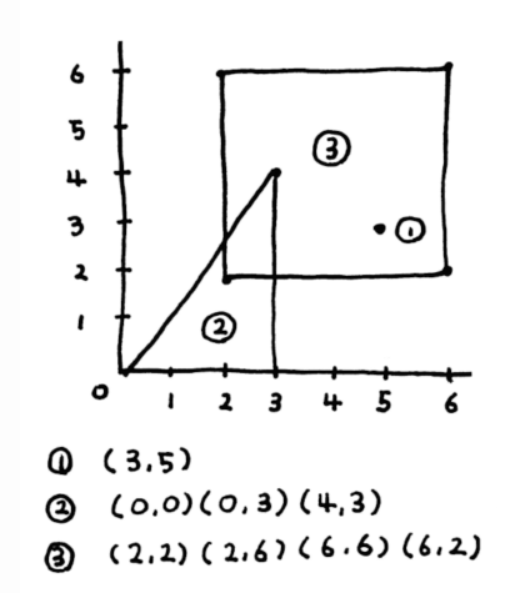

In [2]:
Image("img/01_img.png")

In [3]:
coordinate_1 = {'x': 5, 'y': 3}   # ❶ 점 (좌표)

triangle_1 = {                    # ❷ 삼각형
    'point_a': {'x': 0, 'y': 0},  #    삼각형의 각 꼭지점을
    'point_b': {'x': 3, 'y': 0},  #    좌표로 나타냈다
    'point_c': {'x': 3, 'y': 4},
}

rectangle_1 = {                   # ❸ 사각형
    'point_a': {'x': 2, 'y': 2},  #    꼭지점이 네 개라서
    'point_b': {'x': 6, 'y': 2},  #    좌표도 네 개다
    'point_c': {'x': 6, 'y': 6},
    'point_d': {'x': 2, 'y': 6},
}

 - 위에서 정의한 도형들의 둘레를 구할 수 있는 함수를 만들어보자

In [4]:
# 두 점의 거리와 도형의 둘레를 계산하는 함수

import math   # 제곱근(math.sqrt()) 계산을 위해 수학 모듈 임포트

def square(x):
    """전달받은 수의 제곱을 반환한다."""
    return x * x

def distance(point_a, point_b):
    """두 점 사이의 거리를 계산해 반환한다. (피타고라스의 정리)"""
    return math.sqrt(square(point_a['x'] - point_b['x']) +
                     square(point_a['y'] - point_b['y']))

def circumference_of_triangle(shape):
    """삼각형 데이터를 전달받아 둘레를 구해 반환한다."""
    a_to_b = distance(shape['point_a'], shape['point_b'])
    b_to_c = distance(shape['point_b'], shape['point_c'])
    c_to_a = distance(shape['point_c'], shape['point_a'])
    return a_to_b + b_to_c + c_to_a

def circumference_of_rectangle(shape):
    """사각형 데이터를 전달받아 둘레를 구해 반환한다."""
    a_to_b = distance(shape['point_a'], shape['point_b'])
    b_to_c = distance(shape['point_b'], shape['point_c'])
    c_to_d = distance(shape['point_c'], shape['point_d'])
    d_to_a = distance(shape['point_d'], shape['point_a'])
    return a_to_b + b_to_c + c_to_d + d_to_a

# 둘레 계산
print(circumference_of_triangle(triangle_1))    # 12.0
print(circumference_of_rectangle(rectangle_1))  # 16.0

12.0
16.0


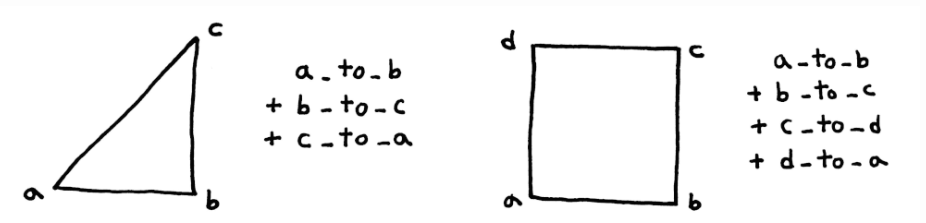

In [5]:
Image("img/02_img.png")

 - 위치나 크기가 다른 삼각형이나 사각형을 위의 방법과 같이 정의하고 위 함수로 둘레를 계산할 수도 있을 것

### 개별 데이터를 정의하기 위한 유형을 약속하기

 - 데이터를 단 하나만 정의하고 사용할 때는 상관이 없지만, 동일한 범주의 데이터를 여럿 정의할 때는 문제가 생길 수 있음
 
 - 컬렉션을 활용해 복잡한 데이터 구조를 나타낼 때, 그 구조를 쌓아올리는 방식이 여러 가지일 수 있기 때문
 
 - 위에서 도형들을 개별 데이터로써 정의했었는데, 이와는 다른 구조로 표현할 수도 있음

In [6]:
coordinate_2 = (3, 5)                  # ❶ 점 (좌표)

triangle_2 = ((0, 0), (0, 3), (4, 3))  # ❷ 삼각형

rectangle_2 = {                        # ❸ 사각형
    'point': (2, 2),
    'width': 4,
    'height': 4,
}

 - 이처럼 대상을 나타내는 데 필요한 정보를 모두 담을 수만 있다면, 데이터를 담는 구조는 자유롭게 구성할 수 있음
 
 - **데이터의 구조가 달라지면 데이터를 처리하는 방법도 달라진다는 것이 문제!**

In [7]:
# 데이터의 표현 방식이 다르면 같은 함수를 사용할 수 없다

print(circumference_of_triangle(triangle_2))
# TypeError: tuple indices must be integers or slices, not str

TypeError: tuple indices must be integers or slices, not str

### 주석으로 데이터의 유형·구조 약속하기

 - 이 문제를 해결하기 위해서는 데이터 객체들(개별 도형들)을 제각각 생각하는 것이 아니라, 데이터 유형(삼각형, 사각형 등)이라는 범주로 묶어 생각할 수 있어야 함
 
 > 예시 : 삼각형, 사각형과 같은 도형들은 몇 가지의 점들로 이루어져 있다 ... '몇 가지 점으로 구성' --> 이 부분을 범주화
 
 - 동일한 범주에 속하는 데이터의 유형을 정의하고 그 구조를 동일하게 구성하는 것
 
 - 지금 우리가 다루고 있는 정보의 범주는 좌표·삼각형·사각형
 
 - 이들의 유형과 구조를 약속할 수 있을까? --> 주석을 이용해서 표기해보자

In [8]:
# 데이터 유형마다 구조를 주석으로 정해 놓기

# 유형: '좌표'는 다음 키를 갖는 사전이다.
#     * 'x': x 축의 위치 (정수)
#     * 'y': y 축의 위치 (정수)
coordinate_1 = {'x': 5, 'y': 3}

# 유형: '삼각형'은 다음 키를 갖는 사전이다.
#     * 'point_a': 첫번째 점의 위치 (좌표)
#     * 'point_b': 두번째 점의 위치 (좌표)
#     * 'point_c': 세번째 점의 위치 (좌표)
triangle_1 = {
    'point_a': {'x': 0, 'y': 0},
    'point_b': {'x': 3, 'y': 0},
    'point_c': {'x': 3, 'y': 4},
}

# 유형: '사각형'은 다음 키를 갖는 사전이다.
#     * 'point_a': 첫번째 점의 위치 (좌표)
#     * 'point_b': 두번째 점의 위치 (좌표)
#     * 'point_c': 세번째 점의 위치 (좌표)
#     * 'point_d': 네번째 점의 위치 (좌표)
rectangle_1 = {
    'point_a': {'x': 2, 'y': 2},
    'point_b': {'x': 6, 'y': 2},
    'point_c': {'x': 6, 'y': 6},
    'point_d': {'x': 2, 'y': 6},
}

 - **동일한 범주의 정보라 하더라도 서로 다른 구조로 표현할 수 있음**
 
 - **어떤 범주의 데이터에 통용되는 연산(함수)을 준비하기 위해서는 데이터의 유형과 구조를 정해두어야 함**

###### 연습문제 8-1 체스말, 바둑돌 정의하기

 - 다음은 사전을 이용해 체스말과 바둑돌 데이터를 나타낸 예
 
 - 체스 말 데이터에서 ‘x’, ‘y’가 위치, ‘color’가 색, ‘role’이 역할을 나타낸다. 
 
 - 바둑돌 데이터에서는 ‘x’, ‘y’가 돌의 위치, ‘order’가 몇 수째에 둔 것인지를 뜻하는 수, ‘color’가 돌의 색을 나타낸다.
 

```
# 이곳에 체스말 데이터 유형 정의하기
체스말1 = {'x': 'A', 'y': '8', 'color': 'black', 'role': '룩'}
체스말2 = {'x': 'E', 'y': '1', 'color': 'white', 'role': '킹'}

# 이곳에 바둑돌 데이터 유형 정의하기
바둑돌1 = {'x': 8, 'y': 14, 'order': 83, 'color': '흑'}
바둑돌2 = {'x': 12, 'y': 3, 'order': 84, 'color': '백'}
```

 - 이 프로그램을 수정하여 체스말 데이터 유형과 바둑돌 데이터 유형을 주석으로 정의해 보아라.

### 데이터의 유형 구별하기

 - 둘레를 구하는 circumference_of_triangle() 함수와 사각형의 둘레를 구하는 circumference_of_rectangle() 함수를 각각 정의함
 
 - 이러한 방식은 어떤 문제가 있을까?
 
 > 1. 이 함수들은 둘 다 ‘도형의 둘레’를 구하는 함수
 >
 > 2. 함수 이름에 _of_triangle(삼각형의)와 같이 도형의 종류가 붙고 있어서 함수 이름이 너무 길어짐
 >
 > 3. 도형의 유형이 늘어날 때마다 비슷한 함수를 계속 만들어야 하는 문제
 
 - circumference()(둘레)라는 함수를 하나 정의해두고, 이 함수로 여러 가지 도형의 둘레를 구할 수 있다면 편리하지 않을까?

#### 인자의 유형에 따라 다르게 동작하는 함수

 - 위와 같이 함수를 만들려면 if 문을 이용해 함수가 전달된 인자의 유형에 따라 다른 동작을 하도록 하면 됨

In [9]:
# 둘레 계산 함수를 일반 함수로 정의하기 (잘못된 방법)

def circumference(shape):
    """도형 데이터를 전달받아 둘레를 구해 반환한다."""
    if type(shape) == '삼각형':    # ❶ 도형의 데이터 유형이 '삼각형'인 경우
        a_to_b = distance(shape['point_a'], shape['point_b'])
        b_to_c = distance(shape['point_b'], shape['point_c'])
        c_to_a = distance(shape['point_c'], shape['point_a'])
        return a_to_b + b_to_c + c_to_a
    
    elif type(shape) == '사각형':  # ❷ 도형의 데이터 유형이 '사각형'인 경우
        a_to_b = distance(shape['point_a'], shape['point_b'])
        b_to_c = distance(shape['point_b'], shape['point_c'])
        c_to_d = distance(shape['point_c'], shape['point_d'])
        d_to_a = distance(shape['point_d'], shape['point_a'])
        return a_to_b + b_to_c + c_to_d + d_to_a
    
    else:                          # ❸ 지원하지 않는 유형인 경우
        return None

# ❹ 잠깐! 삼각형과 사각형을 함수에 대입해보면, 의도와 달리 None이 반환된다!
print(circumference(triangle_1))   # None
print(circumference(rectangle_1))  # None

None
None


 - ❶, ❷에서 type() 함수를 이용해 데이터의 유형을 판단하고, 그에 따라 둘레를 다른 방법으로 계산하도록 구현 ... 설계
 
 - 그렌데 함수를 호출하면 삼각형을 입력하든 사각형을 입력하든, None이 반환
 
 - 그 이유는 ❶ type(triangle_1)과 ❷ type(rectangle_1)의 평가 결과가 삼각형과 사각형이 아니기 때문
 
 - 즉, 우리의 데이터 형식을 함수가 이해하지 못하고 있음

In [10]:
# 삼각형과 사각형 데이터 둘 다 유형이 ‘사전’이다

print(type(triangle_1))   # <class 'dict'>
print(type(rectangle_1))  # <class 'dict'>

<class 'dict'>
<class 'dict'>


#### 데이터의 유형을 나타내는 정보 추가하기

 - 위처럼 데이터 타입, 유형을 알려줄 수 있는 방법은 무엇이 있을까?

 - type() 함수를 사용할 수 없다면 데이터의 유형을 어떻게 구별할 수 있을까? 
 
 - 데이터 유형에 해당되는 정보를 추가하면 되지 않을까? 
 
 - 사전으로 정의한 도형 데이터 속에 'type'이라는 키를 새로 추가하고, 이 키의 값을 데이터 유형으로 사용해보자

In [11]:
# 데이터 유형을 나타내는 정보를 사전에 추가하기

triangle_3 = {
    'type': '삼각형',             # 데이터의 유형을 나타내는 정보
    'point_a': {'x': 0, 'y': 0},
    'point_b': {'x': 3, 'y': 0},
    'point_c': {'x': 3, 'y': 4},
}

rectangle_3 = {
    'type': '사각형',             # 데이터의 유형을 나타내는 정보
    'point_a': {'x': 2, 'y': 2},
    'point_b': {'x': 6, 'y': 2},
    'point_c': {'x': 6, 'y': 6},
    'point_d': {'x': 2, 'y': 6},
}

 - 이제 도형 데이터의 'type' 키를 조사하면 데이터의 유형을 구할 수 있음
 
 - 코드 8-6의 둘레 계산 함수를 다음과 같이 수정하고, type 키가 들어있는 도형 데이터를 입력하여 실행하면 함수가 올바르게 동작함을 확인

In [12]:
# 둘레 계산 함수를 일반 함수로 정의하기 (수정된 방법)

def circumference(shape):
    """도형 데이터를 전달받아 둘레를 구해 반환한다."""
    
    if shape['type'] == '삼각형':    # type() 함수 대신 인덱싱 연산 사용
        a_to_b = distance(shape['point_a'], shape['point_b'])
        b_to_c = distance(shape['point_b'], shape['point_c'])
        c_to_a = distance(shape['point_c'], shape['point_a'])
        return a_to_b + b_to_c + c_to_a
    
    elif shape['type'] == '사각형':  # type() 함수 대신 인덱싱 연산 사용
        a_to_b = distance(shape['point_a'], shape['point_b'])
        b_to_c = distance(shape['point_b'], shape['point_c'])
        c_to_d = distance(shape['point_c'], shape['point_d'])
        d_to_a = distance(shape['point_d'], shape['point_a'])
        return a_to_b + b_to_c + c_to_d + d_to_a
    
    else:
        return None

print(circumference(triangle_3))   # 12.0
print(circumference(rectangle_3))  # 16.0

12.0
16.0


 - 이와 같이 데이터의 구조에 데이터의 유형 자체를 나타내는 정보를 추가함으로써 데이터의 유형을 구별하는 것이 가능
 
 - 함수가 데이터의 유형을 참고하여 그에 맞게 동작하도록 하는 것도 가능

###### 연습문제 8-2 체스말, 바둑돌 출력하기

 - 연습문제 8-1에서 정의한 체스말 또는 바둑돌 데이터를 전달받아 화면에 출력하는 함수 print_piece()를 정의해라. 
 
 - 이 함수는 전달받은 데이터가 체스말인지, 바둑돌인지를 식별해 각각 다른 방식으로 출력해야 한다. 
 
 - 다음은 이 함수를 실행한 예다.

```
>>> print_piece(체스말1)
black 룩이 A8 위치에 놓여 있어요.

>>> print_piece(바둑돌2)
제 84 수: 백이 (12, 3) 위치에 두었습니다.
```

#### 문제점들?

 - 첫번째, 데이터의 유형을 정의할 때 주석을 이용하는 것보다는 파이썬의 기능을 이용하는 편이 좋음
 
 - 그러면 컴퓨터도 데이터 유형을 인식할 수 있고, type() 함수로 유형을 식별하는 것도 가능할 것

 - 두번째, 데이터 유형에 알맞는 함수를 지정하는 방법이 적절하지 않음
 
 - 함수 하나에 다양한 유형의 계산 방법을 넣어둔 것은 바람직하지 않음 --> 데이터 유형이 많아질수록 함수가 길고 복잡해질 테니까! 
 
 - 각 데이터 유형마다 그에 맞는 함수를 별도로 정의하되, 그 함수가 그 데이터 유형에 대해서만 실행될 수 있도록 강제하는 편이 좋음